## Importing Required Libraries

In [2]:
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv("toy_dataset.csv",index_col=False)
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [3]:
df.drop('Number',1,inplace=True)    # 'Number' is not relevent

In [4]:
df.head(3)

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No


In [5]:
print('No. of Illnes data :',len(df[df['Illness'] == 'Yes']))
print('No. of Normal data :',len(df[df['Illness'] == 'No']))
print('Ratio :',round(len(df[df['Illness'] == 'Yes'])/len(df[df['Illness'] == 'No']),5))

No. of Illnes data : 12139
No. of Normal data : 137861
Ratio : 0.08805


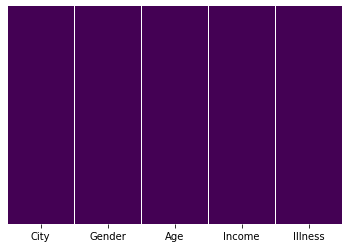

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)  # checking null values
plt.show()

No null value

In [7]:
df['City'].unique() # checking name of the Cities

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

**Converting City name to number

In [8]:
df['City'] =df['City'].map({'Dallas':1, 'New York City':2, 'Los Angeles':3, 'Mountain View':4,
                            'Boston':5, 'Washington D.C.':6, 'San Diego':7, 'Austin':8})

In [9]:
df['City'].unique() # converted City name to number

array([1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
df.head(3) #new look

,City,Gender,Age,Income,Illness
0,1,Male,41,40367.0,No
1,1,Male,54,45084.0,No
2,1,Male,42,52483.0,No


** now gender and Illness have convert binary values say '0' or '1' with the help of dummy variable

In [11]:
d2 = pd.get_dummies(df['Gender'],drop_first=True)
d1 = pd.get_dummies(df['Illness'],drop_first=True)

In [12]:
df1 = pd.concat([df['City'],d2,df[['Age','Income']],d1],axis=1).copy()

In [13]:
del df  # old data deleted

In [14]:
df1.head(3) # new look of the copied Data Frame

,City,Male,Age,Income,Yes
0,1,1,41,40367.0,0
1,1,1,54,45084.0,0
2,1,1,42,52483.0,0


In [15]:
df1.rename(columns={'Yes':'illness'},inplace=True) # changed 'Yes' to 'illness'

In [16]:
df1.head(3)

,City,Male,Age,Income,illness
0,1,1,41,40367.0,0
1,1,1,54,45084.0,0
2,1,1,42,52483.0,0


# EDA

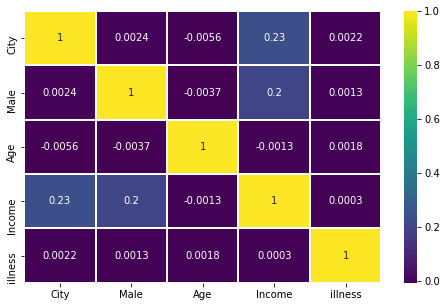

In [17]:
cor = df1.corr()
fig = plt.figure(figsize=(8,5))
sns.heatmap(cor,annot=True,cmap="viridis",linewidths=1)
plt.show()

**Explanation :

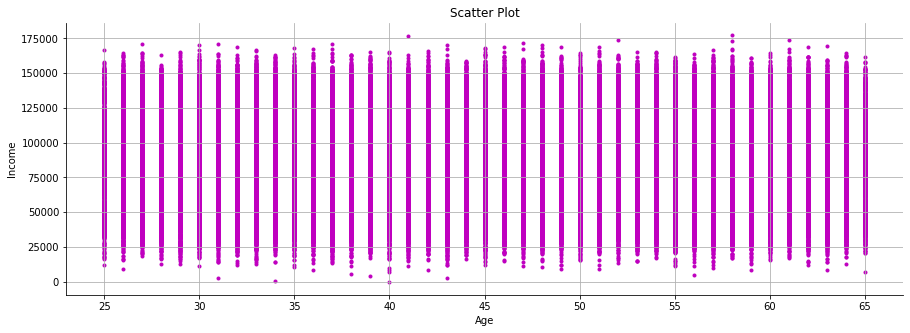

In [18]:
fig = plt.figure(figsize=(15,5))
plt.scatter(df1.Age,df1.Income,c='m',marker='.')
plt.title('Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid()
sns.despine()
plt.show()

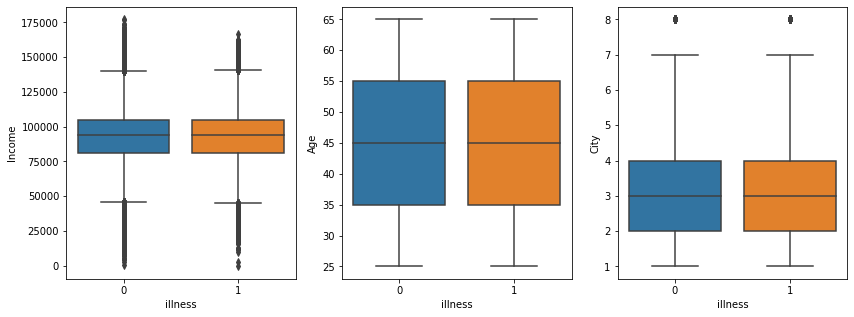

In [19]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,squeeze=True,figsize=(14,5))
sns.boxplot(df1.illness,df1.Income,ax=ax1)
sns.boxplot(df1.illness,df1.Age,ax=ax2)
sns.boxplot(df1.illness,df1.City,ax=ax3)
plt.show()

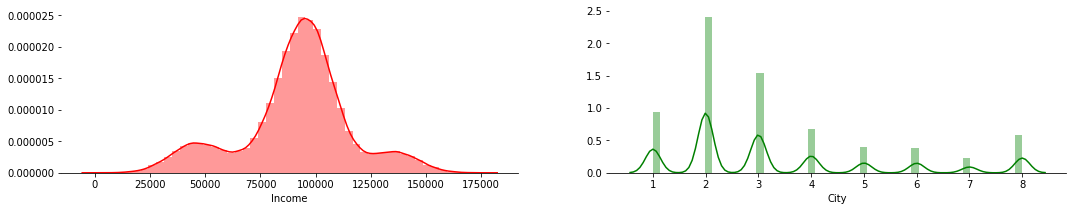

In [20]:
f,(ax1,ax2) = plt.subplots(1,2,squeeze=True,figsize=(18,3))
sns.distplot(df1.Income,ax=ax1,bins=50,color='r')
ax1.set_xlabel('Income')
sns.distplot(df1.City,ax=ax2,color='g')
ax2.set_xlabel('City')
sns.despine(left=True)
plt.show()

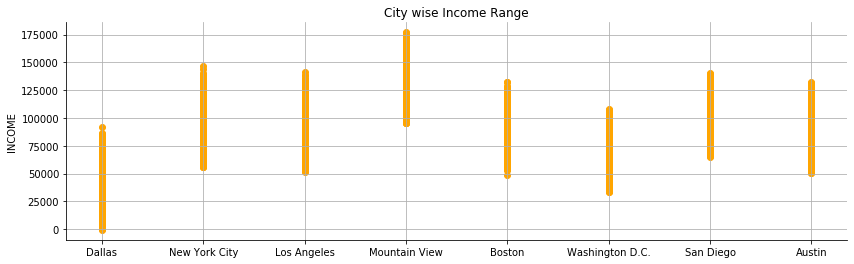

In [21]:
city = ['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
        'Boston', 'Washington D.C.', 'San Diego', 'Austin']
fig = plt.figure(figsize=(14,4))
plt.scatter(df1.City,df1.Income,color='orange')
plt.xticks(range(1,9),city)
plt.title('City wise Income Range')
plt.ylabel("INCOME")
plt.grid()
sns.despine()
plt.show()

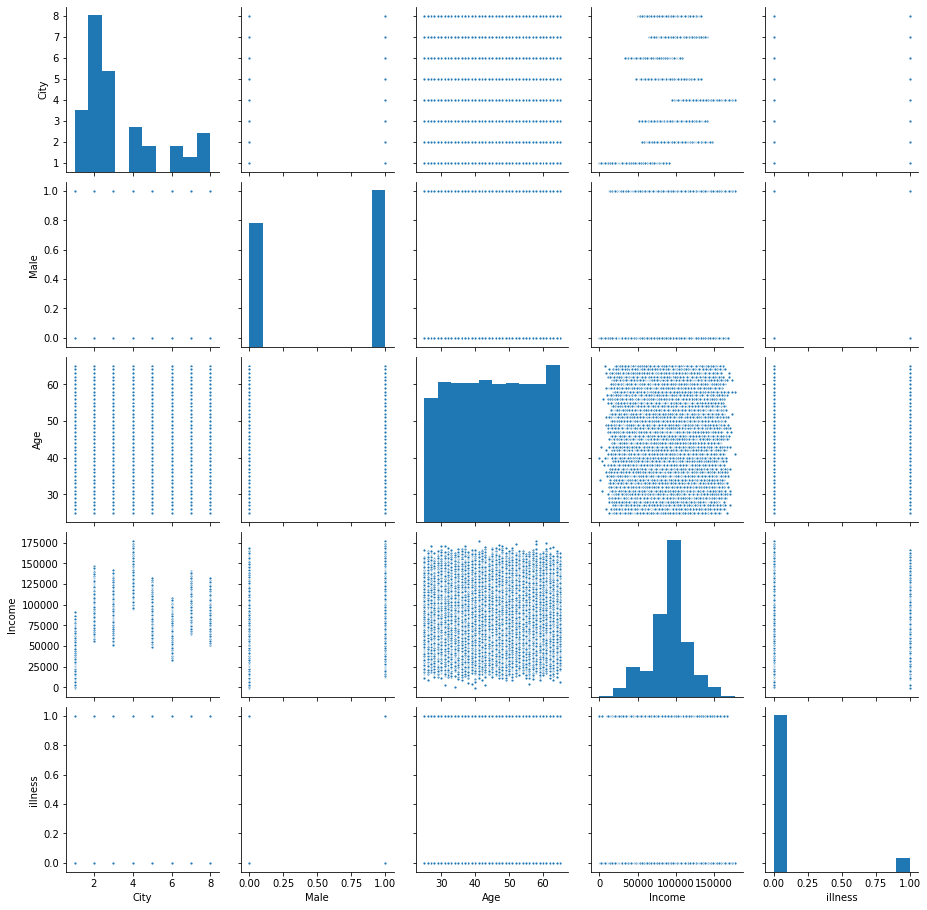

In [22]:
sns.pairplot(df1,markers='.')
plt.show()

# Z-Score anamoly

In [23]:
index = []
def outLier(data):
    thres = 2
    mean = np.mean(data)
    std = np.std(data)
    for i in range(len(data)):
        z_score = (data[i]-mean)/std
        if np.abs(z_score) > thres:
            pass
        else:
            index.append(i)
            
outLier(df1.Income)

cleen_data = []
for i in index:
    cleen_data.append(df1.iloc[i])

In [24]:
df3 = pd.DataFrame(np.array(cleen_data),columns=df1.columns).copy()
df3.head(2)

,City,Male,Age,Income,illness
0,1.0,1.0,54.0,45084.0,0.0
1,1.0,1.0,42.0,52483.0,0.0


In [25]:
print(f'Data Reduced :{len(df1) - len(df3)} out of {len(df1)} hence, new data = {len(df3)}')

Data Reduced :11350 out of 150000 hence, new data = 138650


In [26]:
del df1

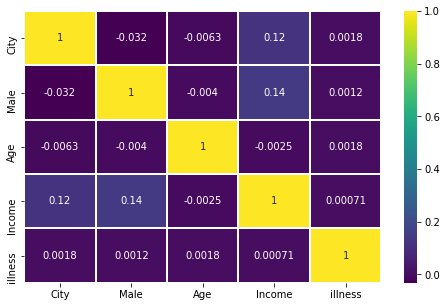

In [27]:
cor = df3.corr()
fig = plt.figure(figsize=(8,5))
sns.heatmap(cor,annot=True,cmap="viridis",linewidths=1)
plt.show()

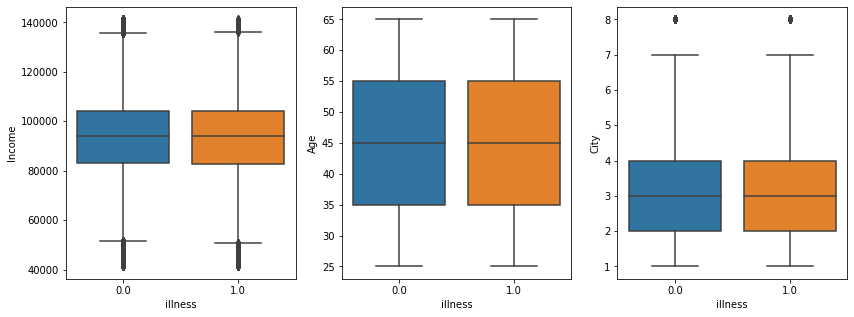

In [28]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,squeeze=True,figsize=(14,5))
sns.boxplot(df3.illness,df3.Income,ax=ax1)
sns.boxplot(df3.illness,df3.Age,ax=ax2)
sns.boxplot(df3.illness,df3.City,ax=ax3)
plt.show()

In [29]:
df3.head()

,City,Male,Age,Income,illness
0,1.0,1.0,54.0,45084.0,0.0
1,1.0,1.0,42.0,52483.0,0.0
2,1.0,1.0,46.0,50289.0,0.0
3,1.0,0.0,36.0,50786.0,0.0
4,1.0,1.0,51.0,68667.0,0.0


In [30]:
df4 = df3[df3['illness']==0].copy()
len(df4)

127405

In [31]:
df5 = df3[df3['illness']==1].copy()
len(df5)

11245

In [32]:
del df3

In [33]:
df6 = df4.iloc[:11245]

In [34]:
df7 = pd.concat([df5,df6],0)

In [35]:
df7 = df7.sample(frac=1,random_state=1) # shuffling the data

In [36]:
print('No of Usable Data :',len(df7))

No of Usable Data : 22490


In [37]:
df7.head() # Shuffled data

,City,Male,Age,Income,illness
102625,4.0,0.0,55.0,115075.0,1.0
27016,2.0,1.0,25.0,111697.0,1.0
37112,2.0,0.0,60.0,80269.0,1.0
163,1.0,1.0,56.0,59154.0,0.0
125144,7.0,1.0,41.0,103800.0,1.0


In [38]:
y = df7['illness']
x = df7[['Male','Age','Income','City']]

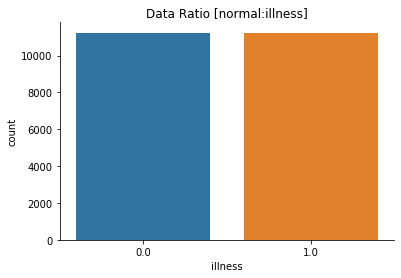

In [39]:
sns.countplot(y)
plt.title('Data Ratio [normal:illness]')
sns.despine()
plt.show()

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline

pipe = Pipeline([('scaler',StandardScaler()),
                ('pca',PCA(n_components=2))])
x = pipe.fit_transform(x)
x = pd.DataFrame(x,columns=['1stComp','2ndComp'])

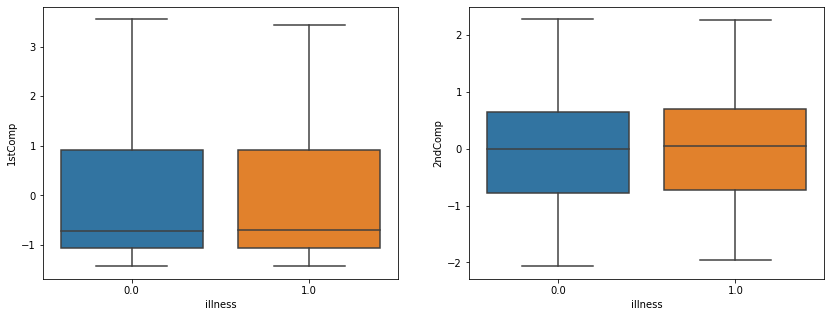

In [41]:
f,(ax1,ax2) = plt.subplots(1,2,squeeze=True,figsize=(14,5))
sns.boxplot(y,x['1stComp'],ax=ax1)
sns.boxplot(y,x['2ndComp'],ax=ax2)
plt.show()

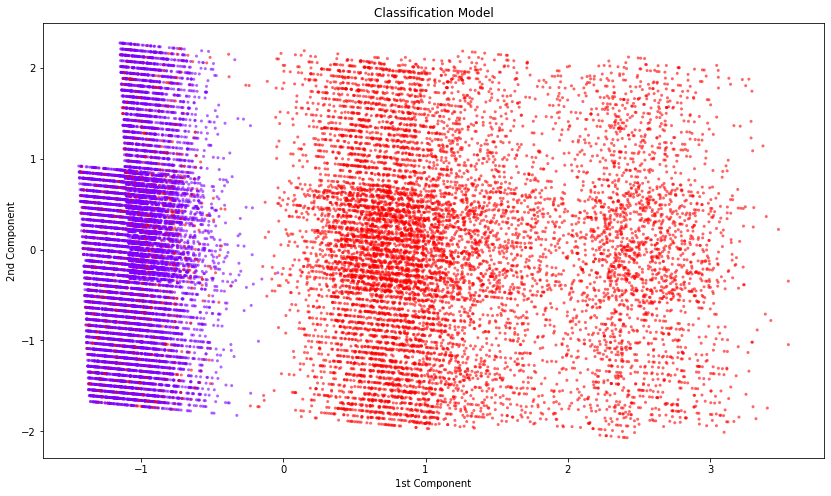

In [42]:
fig = plt.figure(figsize=(14,8))
plt.scatter(x['1stComp'],x['2ndComp'],c=y,cmap='rainbow',alpha=0.6,marker='.',linewidths=0.01)
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.title('Classification Model')
plt.show()

# Startified Split

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(df7,df7['illness']):
    xtrain,xtest = x.iloc[train_index],x.iloc[test_index]
    ytrain,ytest = y.iloc[train_index],y.iloc[test_index]

In [44]:
xtrain=np.array(xtrain)
xtest=np.array(xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

In [45]:
print('train data :',ytrain.shape[0])
print('test data  :',ytest.shape[0])

train data : 17992
test data  : 4498


In [46]:
del df7

Test data size : 4498


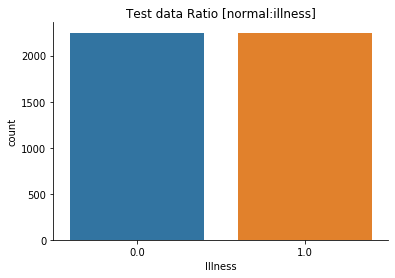

In [47]:
print('Test data size :',len(ytest))
sns.countplot(ytest)
plt.title('Test data Ratio [normal:illness]')
plt.xlabel('Illness')
sns.despine()
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [49]:
model = LogisticRegression(solver='lbfgs')
param = [{"C":[0.1,1,10,100],
          "tol":[0.001,0.0001,0.00001],
        "class_weight":[1,2,3]}]
search = GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',cv=5,n_jobs=-1)
output = search.fit(xtrain,ytrain)
print('Best perameter :',output.best_params_)
print('Acccuracy      :',round(output.best_score_,2)*100,'%')

Best perameter : {'C': 0.1, 'class_weight': 1, 'tol': 0.001}
Acccuracy      : 95.0 %


In [50]:
model = LogisticRegression(C=0.1,class_weight= 1, tol= 0.001,solver='lbfgs')
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

acc = accuracy_score(ytest,y_pred)
cr =classification_report(ytest,y_pred)
print('Accuracy :',round(acc,2)*100,'%')
print('\nConfusion Metrics\n')
print(pd.DataFrame(confusion_matrix(ytest,y_pred),columns=['normal','illness'],
                   index=['normal','illness']))
print('\nClassification Report:\n',cr)

Accuracy : 95.0 %

Confusion Metrics

         normal  illness
normal     2239       10
illness     222     2027

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      2249
         1.0       1.00      0.90      0.95      2249

    accuracy                           0.95      4498
   macro avg       0.95      0.95      0.95      4498
weighted avg       0.95      0.95      0.95      4498



In [51]:
model = RandomForestClassifier()
param = [{"n_estimators":[50,60,70,80,100],
         "max_depth":[6,7,8,9],
        "max_leaf_nodes":[8,9,15]}]
search = GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',cv=5,n_jobs=-1)
output = search.fit(xtrain,ytrain)
print('Best perameter :',output.best_params_)
print('Acccuracy      :',round(output.best_score_,2)*100,'%')

Best perameter : {'max_depth': 6, 'max_leaf_nodes': 8, 'n_estimators': 50}
Acccuracy      : 95.0 %


In [52]:
model = RandomForestClassifier(max_depth= 6, max_leaf_nodes= 8, n_estimators=60)
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

acc = accuracy_score(ytest,y_pred)
cr =classification_report(ytest,y_pred)
print('Accuracy :',round(acc,2)*100,'%')
print('\nConfusion Metrics\n')
print(pd.DataFrame(confusion_matrix(ytest,y_pred),columns=['normal','illness'],
                   index=['normal','illness']))
print('\nClassification Report:\n',cr)

Accuracy : 95.0 %

Confusion Metrics

         normal  illness
normal     2248        1
illness     222     2027

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      2249
         1.0       1.00      0.90      0.95      2249

    accuracy                           0.95      4498
   macro avg       0.95      0.95      0.95      4498
weighted avg       0.95      0.95      0.95      4498



In [53]:
model = DecisionTreeClassifier()
param = [{"max_depth":[6,7,8,10,12],
         "min_weight_fraction_leaf":[0.001,0.01,0.1],
        "max_leaf_nodes":[8,9,15,20]}]
search = GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',cv=5,n_jobs=-1)
output = search.fit(xtrain,ytrain)
print('Best perameter :',output.best_params_)
print('Acccuracy      :',round(output.best_score_,2)*100,'%')

Best perameter : {'max_depth': 6, 'max_leaf_nodes': 8, 'min_weight_fraction_leaf': 0.001}
Acccuracy      : 95.0 %


In [54]:

model = DecisionTreeClassifier(max_depth=6,max_leaf_nodes=8,min_weight_fraction_leaf=0.001)

model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

acc = accuracy_score(ytest,y_pred)
cr =classification_report(ytest,y_pred)
print('Accuracy :',round(acc,2)*100,'%')
print('\nConfusion Metrics\n')
print(pd.DataFrame(confusion_matrix(ytest,y_pred),columns=['normal','illness'],
                   index=['normal','illness']))
print('\nClassification Report:\n',cr)


Accuracy : 95.0 %

Confusion Metrics

         normal  illness
normal     2248        1
illness     222     2027

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      2249
         1.0       1.00      0.90      0.95      2249

    accuracy                           0.95      4498
   macro avg       0.95      0.95      0.95      4498
weighted avg       0.95      0.95      0.95      4498



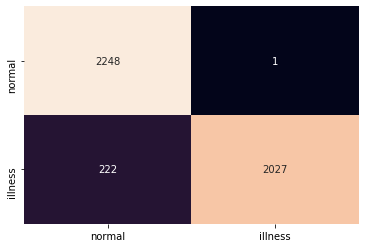

In [55]:
con = pd.DataFrame(confusion_matrix(ytest,y_pred),columns=['normal','illness'],index=['normal','illness'])
sns.heatmap(con,annot=True,cbar=False,fmt='.4g')
plt.show()